Regress the following $x$,$y$ data using ordinary least-squares in 1D. Justify your regression.

```python
x = [0.00, 0.42, 0.83, 1.25, 1.67, 2.08, 2.50, 2.92, 3.33, 3.75, 4.17, 4.58, 5.00, 5.42, 5.83, 6.25, 6.67, 7.08, 7.50, 7.92, 8.33, 8.75, 9.17, 9.58, 10.00]

y = [1.54, -0.73, 1.81, 3.98, 4.65, 5.64, 7.36, 8.09, 9.66, 10.48, 9.14, 11.61, 14.41, 16.04, 15.79, 17.06, 19.33, 21.96, 21.96, 19.42, 23.49, 23.66, 25.45, 26.38, 27.34]
```

p-value for regression is 2.4813451026020177e-23
slope is -0.04046526770663721 +/- 0.1490812491586265
intercept is 2.7722530535413274 +/- 0.8796026602395756
The intercept hypothesis test (null: no intercept) p-value is 0.9281551091008817
Shapiro-Wilks Result: (0.9484186172485352, 0.2309073954820633)


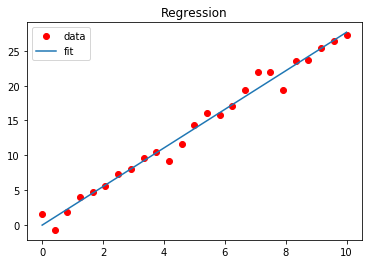

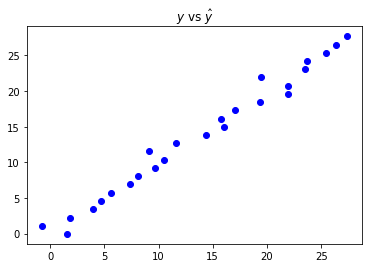

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

x = np.array([0.00, 0.42, 0.83, 1.25, 1.67, 2.08, 2.50, 2.92, 3.33, 3.75, 4.17, 4.58, 5.00, 5.42, 5.83, 6.25, 6.67, 7.08, 7.50, 7.92, 8.33, 8.75, 9.17, 9.58, 10.00])
y = np.array([1.54, -0.73, 1.81, 3.98, 4.65, 5.64, 7.36, 8.09, 9.66, 10.48, 9.14, 11.61, 14.41, 16.04, 15.79, 17.06, 19.33, 21.96, 21.96, 19.42, 23.49, 23.66, 25.45, 26.38, 27.34])

#compute slope intercept
ddof = 2
df = len(x) - ddof
cov = np.cov(x,y, ddof=ddof)
beta_hat = cov[0,1] / cov[0,0]
alpha_hat = np.mean( y - beta_hat * x)

#compute residuals statistics
ssr = np.sum((y - alpha_hat - beta_hat * x)**2)
tss = np.sum((np.mean(y) - y)**2)
pvalue = ss.spearmanr(x, y)[1]

#compute standard errors
s2_epsilon = ssr / df
s2_beta = s2_epsilon / np.sum((x - np.mean(x))**2)
s2_alpha = s2_epsilon * (1 / df + np.mean(x)**2 / (np.sum((np.mean(x) - x)**2)))
#I will use normal since CLT applies throughout
Z = ss.norm.ppf(0.975)

#print report
print('p-value for regression is {}'.format(pvalue))
print('slope is {} +/- {}'.format(alpha_hat, Z * np.sqrt(s2_beta)))
print('intercept is {} +/- {}'.format(beta_hat, Z * np.sqrt(s2_alpha)))

#intercept hypothesis test
T = np.abs(alpha_hat / np.sqrt(s2_alpha))
pintercept = 1 - (ss.norm.cdf(T) - ss.norm.cdf(-T))

print('The intercept hypothesis test (null: no intercept) p-value is {}'.format(pintercept))

#residuals
s = ss.shapiro(x * beta_hat + alpha_hat - y)
print('Shapiro-Wilks Result: {}'.format(s))

#plot
plt.title('Regression')
plt.plot(x,y,'ro', label='data')
plt.plot(x, x * beta_hat + alpha_hat, label='fit')
plt.legend(loc='best')
plt.show()

plt.title('$y$ vs $\hat{y}$')
plt.plot(y, x * beta_hat + alpha_hat, 'bo')
plt.show()

The regression is justified but there should be no intercept. The model is then a linear fit with slope $2.77 \pm 0.15$

Regress $f(x, y) = \sin(\beta_0 x) \, (y - \beta_1)^2+ \beta_2$ to the following data and provide a $p$-value for the existence of $\beta_2$. Only complete the regression (report the coefficients w/o uncertainty), goodness of fit, and $p$-value for $\beta_2$.

```python
x = [-3.14, -2.69, -2.24, -1.80, -1.35, -0.90, -0.45, 0.00, 0.45, 0.90, 1.35, 1.80, 2.24, 2.69, 3.14]
y = [-3.14, -2.69, -2.24, -1.80, -1.35, -0.90, -0.45, 0.00, 0.45, 0.90, 1.35, 1.80, 2.24, 2.69, 3.14]
f = [-15.47, -11.33, -7.95, -4.86, -3.03, -1.23, -0.73, -0.04, 0.33, 0.60, -0.02, 0.02, -0.26, 0.22, 1.10]
```

In [28]:
import scipy.optimize
from numpy import linalg

x = np.array([-3.14, -2.69, -2.24, -1.80, -1.35, -0.90, -0.45, 0.00, 0.45, 0.90, 1.35, 1.80, 2.24, 2.69, 3.14])
y = np.array([-3.14, -2.69, -2.24, -1.80, -1.35, -0.90, -0.45, 0.00, 0.45, 0.90, 1.35, 1.80, 2.24, 2.69, 3.14])
f = np.array([-15.47, -11.33, -7.95, -4.86, -3.03, -1.23, -0.73, -0.04, 0.33, 0.60, -0.02, 0.02, -0.26, 0.22, 1.10])

#find minimum
def SSR(beta):
    fhat = np.sin(beta[0] * x) * (y - beta[1])**2 + beta[2]
    return np.sum((f - fhat)**2)
result = scipy.optimize.minimize(SSR, x0=[1,1,1])

b0 = result.x[0]
b1 = result.x[1]
b2 = result.x[2]

print('beta_0 = {} beta_1  = {} beta_2 = {}'.format(b0, b1, b2))

#residual statistics
df = len(x) - 3
fhat = np.sin(b0 * x) * (y - b1)**2 + b2
resids = f - fhat
pshapiro = ss.shapiro(resids)
ssr = np.sum(resids**2)
tss = np.sum((f - np.mean(f))**2)
s2_epsilon = ssr / df
print('Goodness of fit = {}'.format( 1 - ssr/tss))

#get Fisher information matrix
F_0 = np.cos(b0 * x) * b0 * (y - b1)**2
F_1 = np.sin(b1 * y) * -b1 * -2 * (y - b1)
F_2 = np.ones(np.shape(F_1))
F = np.column_stack((F_0, F_1, F_2))

#error analysis
s2_beta = s2_epsilon * linalg.inv(F.transpose().dot(F))

#hypothesis test for b2
T = np.abs(b2 / np.sqrt(s2_beta[2,2]))
pvalue = 1 - (ss.t.cdf(T, df) - ss.t.cdf(-T, df))
print('p-value for existence of beta_2 = {}'.format(pvalue))


beta_0 = 0.2088534704836723 beta_1  = 1.9140249063031551 beta_2 = 0.017388243030695433
Goodness of fit = 0.9984913721060645
p-value for existence of beta_2 = 0.8212027717756998
